In [40]:
# importing libraries
import pandas as pd # data science essential
import seaborn as sns # essential graphical output
import matplotlib.pyplot as plt # enhanced graphical output
import numpy as np # mathematical essential
import statsmodels.formula.api as smf # regression modeling

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = './__datasets/birthweight_low.xlsx'

# reading the file into python
birthwt = pd.read_excel(io = file,
                   sheet_name = 0,
                   header = 0)

In [41]:
# making a copy of the original file as birthwt_df
birthwt_df = pd.DataFrame.copy(birthwt)

In [42]:
# checking the top five rows of our dataframe. 
birthwt_df.head()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


As per the dictionary, omaps and fmaps are one minute apgar score and five minute apgar score respectively. As per the website of John Hopkins All Children's Hospital, the Apgar score is a test given to newborns soon after birth. This test checks a baby's heart rate, muscle tone, and other signs to see if extra medical care or emergency care is needed. The test is usually given twice: once at 1 minute after birth, and again at 5 minutes after birth. Sometimes, if there are concerns about the baby's condition, the test may be given again. As this test is a postpartum event, omaps and fmaps may not be used as independent variables for predicting the birthweight. 

In [43]:
# checking for missing values
birthwt_df.isnull().any(axis = 0)

mage      False
meduc      True
monpre    False
npvis      True
fage      False
feduc      True
omaps     False
fmaps     False
cigs      False
drink     False
male      False
mwhte     False
mblck     False
moth      False
fwhte     False
fblck     False
foth      False
bwght     False
dtype: bool

In [44]:
# finding the number of missing values
birthwt_df.isnull().sum(axis=0)

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

The features meduc (mother's education) and npvis(total number of prenatal visits) have three missing values each, while feduc (father's education) has seven missing values.

In [45]:
# looping to detect features with missing values
for col in birthwt_df:

    # creating columns with 1s if missing and 0 if not
    if birthwt_df[col].isnull().astype(int).sum() > 0:
        birthwt_df['m_'+col] = birthwt_df[col].isnull().astype(int)

In [46]:
# checking the missing value flags and datatypes for variables
birthwt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mage     196 non-null    int64  
 1   meduc    193 non-null    float64
 2   monpre   196 non-null    int64  
 3   npvis    193 non-null    float64
 4   fage     196 non-null    int64  
 5   feduc    189 non-null    float64
 6   omaps    196 non-null    int64  
 7   fmaps    196 non-null    int64  
 8   cigs     196 non-null    int64  
 9   drink    196 non-null    int64  
 10  male     196 non-null    int64  
 11  mwhte    196 non-null    int64  
 12  mblck    196 non-null    int64  
 13  moth     196 non-null    int64  
 14  fwhte    196 non-null    int64  
 15  fblck    196 non-null    int64  
 16  foth     196 non-null    int64  
 17  bwght    196 non-null    int64  
 18  m_meduc  196 non-null    int32  
 19  m_npvis  196 non-null    int32  
 20  m_feduc  196 non-null    int32  
dtypes: float64(3), i

In [47]:
# creating an independent DataFrame for dropping the missing values
df_dropped = pd.DataFrame.copy(birthwt_df)


# using dropna() for df_dropped
df_dropped = df_dropped.dropna().round(2)


# checking to see if all missing values have been dropped
print(df_dropped.isnull().sum())


mage       0
meduc      0
monpre     0
npvis      0
fage       0
feduc      0
omaps      0
fmaps      0
cigs       0
drink      0
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght      0
m_meduc    0
m_npvis    0
m_feduc    0
dtype: int64


We shall check the distribution of features with missing values in the newly created dataframe (without missing values). This will help to decide whether to use mean, median or any other value for imputing the missing values.

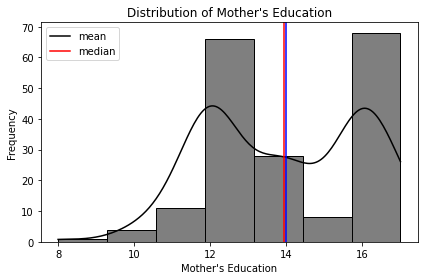

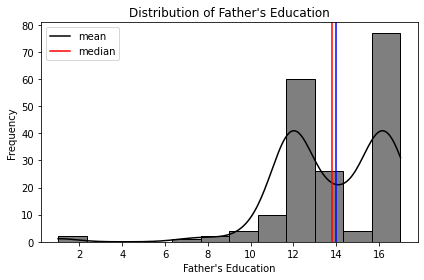

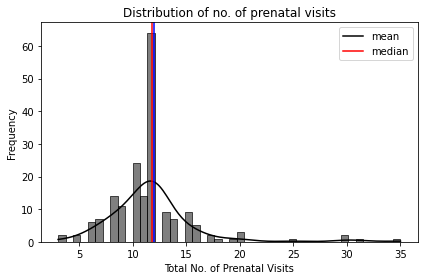

In [48]:
# histogram for meduc
sns.histplot(data  = df_dropped,
             x     ='meduc',
             bins  = 'fd',
             kde   = True,
             color = 'black')

# labeling the histogran
plt.title(label = "Distribution of Mother's Education")
plt.xlabel(xlabel = "Mother's Education")
plt.ylabel(ylabel = 'Frequency')

# Adding vertical lines to the code to indicate mean and median of the distribution
plt.axvline(x = df_dropped['meduc'].mean(),
            color = 'red')
plt.axvline(x = df_dropped['meduc'].median(),
            color = 'blue')

# adding legend
plt.legend(labels =  ['mean', 'median'])

# compiling and displaying the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

# histogram for feduc
sns.histplot(data  = df_dropped,
             x     ='feduc',
             bins  = 'fd',
             kde   = True,
             color = 'black')

# labeling the histogran
plt.title(label = "Distribution of Father's Education")
plt.xlabel(xlabel = "Father's Education")
plt.ylabel(ylabel = 'Frequency')

# Adding vertical lines to the code to indicate mean and median of the distribution
plt.axvline(x = df_dropped['feduc'].mean(),
            color = 'red')
plt.axvline(x = df_dropped['feduc'].median(),
            color = 'blue')

# adding legend
plt.legend(labels =  ['mean', 'median'])

# compiling and displaying the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

# histogram for npvis
sns.histplot(data  = df_dropped,
             x     ='npvis',
             bins  = 'fd',
             kde   = True,
             color = 'black')

# labeling the histogran
plt.title(label = "Distribution of no. of prenatal visits")
plt.xlabel(xlabel = "Total No. of Prenatal Visits")
plt.ylabel(ylabel = 'Frequency')

# Adding vertical lines to the code to indicate mean and median of the distribution
plt.axvline(x = df_dropped['npvis'].mean(),
            color = 'red')
plt.axvline(x = df_dropped['npvis'].median(),
            color = 'blue')

# adding legend
plt.legend(labels =  ['mean', 'median'])

# compiling and displaying the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

In mother's education and father's education, median appears to be more representative, while in no. of prenatal visits, mean seems to be more representative. We shall accordingly impute the missing values.

In [49]:
# soft coding MEDIAN for meduc from df_dropped
meduc_median = df_dropped['meduc'].median()

# filling meduc NAs in our working dataframe with MEDIAN of 'meduc' distribution excluding NAs
birthwt_df['meduc'].fillna(value = meduc_median,
                         inplace = True)

# soft coding MEDIAN for feduc from df_dropped
feduc_median = df_dropped['feduc'].median()

# filling feduc NAs in our working dataframe with MEDIAN of 'feduc' distribution excluding NAs
birthwt_df['feduc'].fillna(value = feduc_median,
                         inplace = True)

# soft coding MEAN for npvis from df_dropped
npvis_mean = df_dropped['npvis'].mean()

# filling npvis NAs in our working dataframe with MEAN of 'npvis' distribution excluding NAs
birthwt_df['npvis'].fillna(value = npvis_mean,
                         inplace = True)


# checking to make sure NAs are filled in
print(birthwt_df['meduc'].isnull().any())
print(birthwt_df['feduc'].isnull().any())
print(birthwt_df['npvis'].isnull().any())

False
False
False


In [50]:
# subsetting original missing values for meduc, feduc and npvis to check the imputed values
print(birthwt_df.loc[ : , ['m_meduc', 'meduc']][  birthwt_df.loc[ : , 'm_meduc'] == 1  ])
print(birthwt_df.loc[ : , ['m_feduc', 'feduc']][  birthwt_df.loc[ : , 'm_feduc'] == 1  ])
print(birthwt_df.loc[ : , ['m_npvis', 'npvis']][  birthwt_df.loc[ : , 'm_npvis'] == 1  ])

     m_meduc  meduc
0          1   14.0
111        1   14.0
114        1   14.0
     m_feduc  feduc
0          1   14.0
74         1   14.0
99         1   14.0
114        1   14.0
153        1   14.0
164        1   14.0
191        1   14.0
     m_npvis      npvis
73         1  11.752688
111        1  11.752688
185        1  11.752688


Text(0, 0.5, 'Frequency')

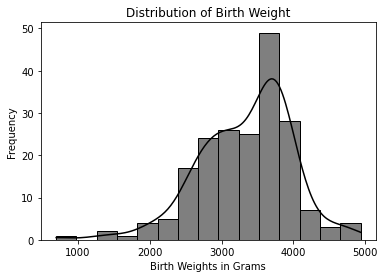

In [51]:
# histogram for bwght to check the distribution of target variable
sns.histplot(data  = birthwt_df,
             x     ='bwght',
             bins  = 'fd',
             kde   = True,
             color = 'black')


# labeling the histogran
plt.title(label = "Distribution of Birth Weight")
plt.xlabel(xlabel = "Birth Weights in Grams")
plt.ylabel(ylabel = 'Frequency')

There are many birth weights with less than 1000 gms. However, this is possible in prematured births. As per a New York Times report, a baby named Curtis was born with birthweight of less than a pound and he survived. As per the report, Curtis’s early birth reflects the persistently high frequency of premature births in the United States, where the yearly rate of preterm births hovers at about 10 percent, according to the March of Dimes. In Alabama, the rate was 12.5 percent in 2019, according to the organization. Thus, we are considering the extremely low data as correct and retaining the same. https://www.nytimes.com/2021/11/13/us/premature-baby-guinness-record.html  

In [52]:
# checking skewness in all variables
birthwt_df.skew()

mage       0.922193
meduc     -0.071834
monpre     2.031858
npvis      2.229291
fage       1.120425
feduc     -1.338531
omaps     -2.641176
fmaps     -2.551277
cigs       0.031881
drink      0.234876
male      -0.206738
mwhte      1.041790
mblck      0.486607
moth       0.648090
fwhte      0.648090
fblck      0.672052
foth       0.821757
bwght     -0.659832
m_meduc    7.957157
m_npvis    7.957157
m_feduc    5.042374
dtype: float64

As many variables are highly skewed, we shall log transform them. Before that we shall check for zeros in them and add the zeros with 0.001 before log transformation. 

In [53]:
# counting the number of zeroes in continuous variables
mage_zeroes   = len(birthwt_df['mage'][birthwt_df['mage'] == 0])
meduc_zeroes   = len(birthwt_df['meduc'][birthwt_df['meduc'] == 0])
monpre_zeroes = len(birthwt_df['monpre'][birthwt_df['monpre'] == 0])
npvis_zeroes = len(birthwt_df['npvis'][birthwt_df['npvis'] == 0])
fage_zeroes   = len(birthwt_df['fage'][birthwt_df['fage'] == 0])
feduc_zeroes   = len(birthwt_df['feduc'][birthwt_df['feduc'] == 0])
cigs_zeroes     = len(birthwt_df['cigs'][birthwt_df['cigs'] == 0])
drink_zeroes = len(birthwt_df['drink'][birthwt_df['drink'] == 0])
bwght_zeroes   = len(birthwt_df['bwght'][birthwt_df['bwght'] == 0])



# printing a table of the results
print(f"""
                           Zeros\tNo Zeros
            ------------------------------------
Mother's Age               |{mage_zeroes}\t\t{len(birthwt_df) - mage_zeroes}
Mother's Education         |{meduc_zeroes}\t\t{len(birthwt_df) - meduc_zeroes}
Month prenatal care began  |{monpre_zeroes}\t\t{len(birthwt_df) - monpre_zeroes}
No. of prenatal visits     |{npvis_zeroes}\t\t{len(birthwt_df) - npvis_zeroes}
Father's Age               |{fage_zeroes}\t\t{len(birthwt_df) - fage_zeroes}
Father's Education         |{feduc_zeroes}\t\t{len(birthwt_df) - feduc_zeroes}
No. of Cigarettes          |{cigs_zeroes}\t\t{len(birthwt_df) - cigs_zeroes}
No. of drinks              |{drink_zeroes}\t\t{len(birthwt_df) - drink_zeroes}
Birth Weight               |{bwght_zeroes}\t\t{len(birthwt_df) - bwght_zeroes}
""")


                           Zeros	No Zeros
            ------------------------------------
Mother's Age               |0		196
Mother's Education         |0		196
Month prenatal care began  |0		196
No. of prenatal visits     |0		196
Father's Age               |0		196
Father's Education         |0		196
No. of Cigarettes          |9		187
No. of drinks              |11		185
Birth Weight               |0		196



Smoking and drinking have generally negative impact on birthweight. However, there are values with zero drink or smoke, and they are not necessarily for the same observation. If we create a new variable, where either of smoking or drinking can be captured, then we may have a better explanation for birthweight. Therefore, a new variable is created by adding the values of these two columns. This is because multiplying the columns may result in many more zeros. We name this new variable as 'toxic'. 

In [54]:
#  creating a new column toxic and checking the dataframe
birthwt_df['toxic'] = birthwt_df.cigs+birthwt_df.drink
birthwt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mage     196 non-null    int64  
 1   meduc    196 non-null    float64
 2   monpre   196 non-null    int64  
 3   npvis    196 non-null    float64
 4   fage     196 non-null    int64  
 5   feduc    196 non-null    float64
 6   omaps    196 non-null    int64  
 7   fmaps    196 non-null    int64  
 8   cigs     196 non-null    int64  
 9   drink    196 non-null    int64  
 10  male     196 non-null    int64  
 11  mwhte    196 non-null    int64  
 12  mblck    196 non-null    int64  
 13  moth     196 non-null    int64  
 14  fwhte    196 non-null    int64  
 15  fblck    196 non-null    int64  
 16  foth     196 non-null    int64  
 17  bwght    196 non-null    int64  
 18  m_meduc  196 non-null    int32  
 19  m_npvis  196 non-null    int32  
 20  m_feduc  196 non-null    int32  
 21  toxic    196 non

In [55]:
# checking the number of zeros in toxic
toxic_zeroes = len(birthwt_df['toxic'][birthwt_df['toxic'] == 0])

# printing a table of the results
print(f"""
                    Zeros\tNo Zeros
            ------------------------------------
Toxic               {toxic_zeroes}\t\t{len(birthwt_df) - toxic_zeroes}""")


                    Zeros	No Zeros
            ------------------------------------
Toxic               2		194


It is observed that the number of zeros have come down considerably in the new variable. Thus, it meets our objective of capturing the combined effect of smoking and drinking habits. We may also create new features to explain as to whether an expecting mother smokes, drinks or does both. 

In [56]:
# creating new variables to indicate a smoker, a drinker or both
# placeholder variables
birthwt_df['if_smokes'] = 0
birthwt_df['if_drinks'] = 0
birthwt_df['if_toxic'] = 0

for index, value in birthwt_df.iterrows():
    

    # cigarette
    if birthwt_df.loc[index, 'cigs'] > 0:
        birthwt_df.loc[index, 'if_smokes'] = 1
        
        
    # drinks
    if birthwt_df.loc[index, 'drink'] > 0:
        birthwt_df.loc[index, 'if_drinks'] = 1
        
    # both smoke and drink
    if birthwt_df.loc[index, 'toxic'] > 0:
        birthwt_df.loc[index, 'if_toxic'] = 1
        

In [57]:
# log transforming certain variables and saving to working dataframe
# 
birthwt_df['log_mage'] = np.log(birthwt_df['mage'])
birthwt_df['log_meduc'] = np.log(birthwt_df['meduc'])
birthwt_df['log_monpre'] = np.log(birthwt_df['monpre'])
birthwt_df['log_npvis'] = np.log(birthwt_df['npvis'])
birthwt_df['log_fage'] = np.log(birthwt_df['fage'])
birthwt_df['log_feduc'] = np.log(birthwt_df['feduc'])
birthwt_df['log_toxic'] = np.log(birthwt_df['toxic'] + 0.001)
birthwt_df['log_bwght'] = np.log(birthwt_df['bwght'])

In [58]:
# checking the dataframe for features
birthwt_df.head()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc,toxic,if_smokes,if_drinks,if_toxic,log_mage,log_meduc,log_monpre,log_npvis,log_fage,log_feduc,log_toxic,log_bwght
0,69,14.0,5,2.0,62,14.0,4,7,23,9,1,0,1,0,0,1,0,697,1,0,1,32,1,1,1,4.234107,2.639057,1.609438,0.693147,4.127134,2.639057,3.465767,6.546785
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290,0,0,0,36,1,1,1,4.219508,2.484907,1.098612,2.302585,4.110874,2.397895,3.583547,7.162397
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490,0,0,0,33,1,1,1,4.262680,2.484907,1.098612,1.791759,3.828641,2.484907,3.496538,7.306531
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720,0,0,0,31,1,1,1,4.077537,2.772589,0.000000,2.079442,3.871201,2.772589,3.434019,7.450080
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956,0,0,0,30,1,1,1,3.871201,2.484907,1.386294,1.791759,3.663562,2.484907,3.401231,7.578657


In [59]:
# creating a (Pearson) correlation matrix to check the correlation among the variables
df_corr = birthwt_df.corr().round(2)

# printing (Pearson) correlations of variables with birthweight and log of birthweight
print(df_corr.loc['bwght'].sort_values(ascending = False))
print(df_corr.loc['log_bwght'].sort_values(ascending = False))

bwght         1.00
log_bwght     0.97
omaps         0.25
fmaps         0.25
log_feduc     0.16
log_npvis     0.16
feduc         0.13
mblck         0.13
fblck         0.12
male          0.11
log_meduc     0.09
meduc         0.09
npvis         0.06
m_npvis       0.06
m_feduc      -0.00
moth         -0.02
fwhte        -0.04
monpre       -0.05
log_monpre   -0.06
foth         -0.08
mwhte        -0.11
m_meduc      -0.13
if_toxic     -0.17
if_smokes    -0.26
if_drinks    -0.27
log_fage     -0.38
fage         -0.40
log_mage     -0.42
mage         -0.46
log_toxic    -0.49
cigs         -0.57
toxic        -0.74
drink        -0.74
Name: bwght, dtype: float64
log_bwght     1.00
bwght         0.97
fmaps         0.32
omaps         0.31
log_npvis     0.24
log_feduc     0.16
feduc         0.13
npvis         0.11
fblck         0.09
log_meduc     0.09
mblck         0.09
meduc         0.09
male          0.08
m_npvis       0.06
moth          0.00
foth         -0.04
fwhte        -0.04
monpre       -0.09
log

It is observed that the features have better correlation with 'birthweight' rather than log of birthweight. Therefore, we shall treat birthweight as our target variable. As discussed previously, we shall also drop omaps and fmaps as features in our model. Now, we shall use OLS, Lasso and ARD separately to find the best feasible model after dividing the working dataframe in train and test sets. We shall also drop one feature each from the father's and mother's ethnicity as they have been created as dummy variables.  

In [60]:
# importing packages for linear regression
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression
# preparing explanatory variable data
birthwt_feature   = birthwt_df.drop(['bwght', 'log_bwght',
                               'omaps', 'fmaps', 'mwhte', 'fwhte'],
                                axis = 1)


# preparing response variable data
birthwt_target = birthwt_df.loc[ : , 'bwght']
# ready for use later


# preparing training and testing sets with 25% of data in testing set and 219 random state 
x_train, x_test, y_train, y_test = train_test_split(
            birthwt_feature,
            birthwt_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape[0]}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape[0]}
""")


Training Data
-------------
X-side: (147, 27)
y-side: 147


Testing Data
------------
X-side: (49, 27)
y-side: 49



In [61]:
# checking the columns of the feature dataset
birthwt_feature.head()

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mblck,moth,fblck,foth,m_meduc,m_npvis,m_feduc,toxic,if_smokes,if_drinks,if_toxic,log_mage,log_meduc,log_monpre,log_npvis,log_fage,log_feduc,log_toxic
0,69,14.0,5,2.0,62,14.0,23,9,1,1,0,1,0,1,0,1,32,1,1,1,4.234107,2.639057,1.609438,0.693147,4.127134,2.639057,3.465767
1,68,12.0,3,10.0,61,11.0,25,11,1,0,0,0,0,0,0,0,36,1,1,1,4.219508,2.484907,1.098612,2.302585,4.110874,2.397895,3.583547
2,71,12.0,3,6.0,46,12.0,21,12,1,1,0,1,0,0,0,0,33,1,1,1,4.262680,2.484907,1.098612,1.791759,3.828641,2.484907,3.496538
3,59,16.0,1,8.0,48,16.0,21,10,0,0,1,0,1,0,0,0,31,1,1,1,4.077537,2.772589,0.000000,2.079442,3.871201,2.772589,3.434019
4,48,12.0,4,6.0,39,12.0,17,13,0,0,0,0,0,0,0,0,30,1,1,1,3.871201,2.484907,1.386294,1.791759,3.663562,2.484907,3.401231


In [62]:
# merging X_train and y_train so that they can be used in statsmodels
birthwt_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: building a model with selective features having high correlation with target
lm_best = smf.ols(formula =  """bwght ~ meduc +
fage + cigs + drink + moth + mblck + foth +
fblck + m_meduc + m_npvis + toxic + if_smokes + if_drinks +
if_toxic""", data = birthwt_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     25.33
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           8.01e-30
Time:                        13:36:41   Log-Likelihood:                -1073.1
No. Observations:                 147   AIC:                             2174.
Df Residuals:                     133   BIC:                             2216.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3796.3818    477.630      7.948      0.0

It is observed that a number of features have p-value of more than 0.05. We shall create another linear model after dropping them.

In [63]:
# Step 4: build another linear model after dropping high p-value variables
lm_best1 = smf.ols(formula =  """bwght ~ toxic + drink + m_npvis + fage""", 
                   data = birthwt_train)

# Step 5: fit the model based on the data
results_1 = lm_best1.fit()

# Step 6: analyzing the summary output
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     74.86
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           5.24e-34
Time:                        13:36:43   Log-Likelihood:                -1081.3
No. Observations:                 147   AIC:                             2173.
Df Residuals:                     142   BIC:                             2188.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4929.5272    145.538     33.871      0.0

In [64]:
# declaring set of x-variables used in lm_best1 model with p-values <= 0.05
x_variables = ['toxic', 'drink', 'fage']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

toxic +
drink +
fage +


In [65]:
# applying model in scikit-learn

# Preparing a DataFrame based on the analysis above
ols_data   = birthwt_df.loc[ : , x_variables]


# Preparing the target variable
birthwt_target = birthwt_df.loc[ : , 'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y) with all features
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthwt_feature,     # x-variables
            birthwt_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            birthwt_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [66]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.6757
OLS Testing Score  : 0.7252
OLS Train-Test Gap : 0.0495


In [67]:
# zipping each feature name to its coefficient
lr_model_values = zip(birthwt_feature[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 4945.67)
('toxic', -36.84)
('drink', -83.22)
('fage', -13.94)


Now, we shall use lasso regression model to check whether we get a better prediction. Here, we use all the features as the model will penalize insignificant features automatically.

In [68]:
import sklearn.linear_model # linear models
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magnitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))



# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7508
Lasso Testing Score  : 0.585
Lasso Train-Test Gap : 0.1658


C:\Users\RBI\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [69]:
# zipping each feature name to its coefficient
lasso_model_values = zip(birthwt_feature.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3703.02)
('mage', -14.32)
('meduc', 21.09)
('monpre', 3.5)
('npvis', -0.71)
('fage', -2.45)
('feduc', 0.0)
('cigs', -0.0)
('drink', -65.68)
('male', 49.87)
('mblck', -0.0)
('moth', -56.32)
('fblck', 0.0)
('foth', -0.0)
('m_meduc', -228.88)
('m_npvis', 409.97)
('m_feduc', 0.0)
('toxic', -38.41)
('if_smokes', -0.0)
('if_drinks', 144.65)
('if_toxic', 279.93)
('log_mage', -0.0)
('log_meduc', 0.0)
('log_monpre', 13.33)
('log_npvis', 111.16)
('log_fage', -0.0)
('log_feduc', 122.38)
('log_toxic', 0.0)


Now, we shall use ARD model with all features as the model will penalize insignificant features automatically.

In [70]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7544
Testing Score : 0.6076
ARD Train-Test Gap : 0.1468


C:\Users\RBI\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [71]:
# zipping each feature name to its coefficient
ard_model_values = zip(birthwt_feature.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', -602.94)
('mage', -57.84701)
('meduc', 17.66695)
('monpre', 0.00178)
('npvis', -0.00062)
('fage', -0.00087)
('feduc', 0.00135)
('cigs', -0.00031)
('drink', -58.53667)
('male', 0.00473)
('mblck', 5e-05)
('moth', -51.36977)
('fblck', 1e-05)
('foth', -0.00058)
('m_meduc', -0.00316)
('m_npvis', 143.4282)
('m_feduc', -0.00016)
('toxic', -43.96055)
('if_smokes', -3e-05)
('if_drinks', 0.00332)
('if_toxic', 0.00077)
('log_mage', 1767.75414)
('log_meduc', 0.0019)
('log_monpre', 0.00171)
('log_npvis', 91.76915)
('log_fage', -0.00046)
('log_feduc', 105.01273)
('log_toxic', 47.40737)


In [72]:
# comparing results

print(f"""
Model      Train Score      Test Score        Train-Test Gap
-----      -----------      ----------        --------------
OLS*        {lr_train_score}           {lr_test_score}            {lr_test_gap}
Lasso       {lasso_train_score}           {lasso_test_score}             {lasso_test_gap}
ARD         {ard_train_score}           {ard_test_score}            {ard_test_score}
* - Best model""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./__model_results/linear_model_performance.xlsx',
                           index = False)


Model      Train Score      Test Score        Train-Test Gap
-----      -----------      ----------        --------------
OLS*        0.6757           0.7252            0.0495
Lasso       0.7508           0.585             0.1658
ARD         0.7544           0.6076            0.6076
* - Best model


My best model is OLS